<a href="https://colab.research.google.com/github/HSYhrae/mulcamp_FinalPJ/blob/main/final_pj_ML(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 및 라이브러리 불러오기

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('/content/drive/MyDrive/Mulcamp_final/data/Telco_customer_churn(preprocessed).xlsx')
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,ChurnCategory_0,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_Other,ChurnCategory_Price
0,1,0,0,2,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,8,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,28,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,49,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0


- 데이터 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   InternetService                          7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

### 머신러닝 준비

In [48]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [52]:
# 수치형 변수
numeric_features = X[['tenure', 'Age', 'NumberOfReferrals', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'CLTV', 'SatisfactionScore']]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [54]:
from sklearn.preprocessing import StandardScaler
# 수치형 변수 표준화, dataframe 생성
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

In [55]:
# 데이터 불균형으로 oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((8254, 54), (8254,))

In [56]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train)*100

26.63111111111111

In [57]:
y_train

1007    1
2727    0
2935    0
857     1
2890    0
       ..
79      1
3927    0
5955    0
6936    0
5640    0
Name: Churn, Length: 5625, dtype: int64

#### 로지스틱 회귀분석

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression(random_state=0, max_iter=1000)
params = {"C" : [0.01, 0.1, 1, 5, 10]}

# grid_cv = GridSearchCV(lr_clf, param_grid=params, cv=5, n_jobs=-1)
lr_clf.fit(X_train_over, y_train_over)

# print(grid_cv.best_params_)

train_pred = lr_clf.predict(X_train_over)
pred = lr_clf.predict(X_test)

from sklearn.metrics import accuracy_score  # 정확도 라이브러리 호출
print(accuracy_score(y_train_over, train_pred))
print(accuracy_score(y_test, pred))

0.9093772716258783
0.8777540867093105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, pred.shape)

(5782, 54) (2066, 54) (5782,) (2066,) (2066,)


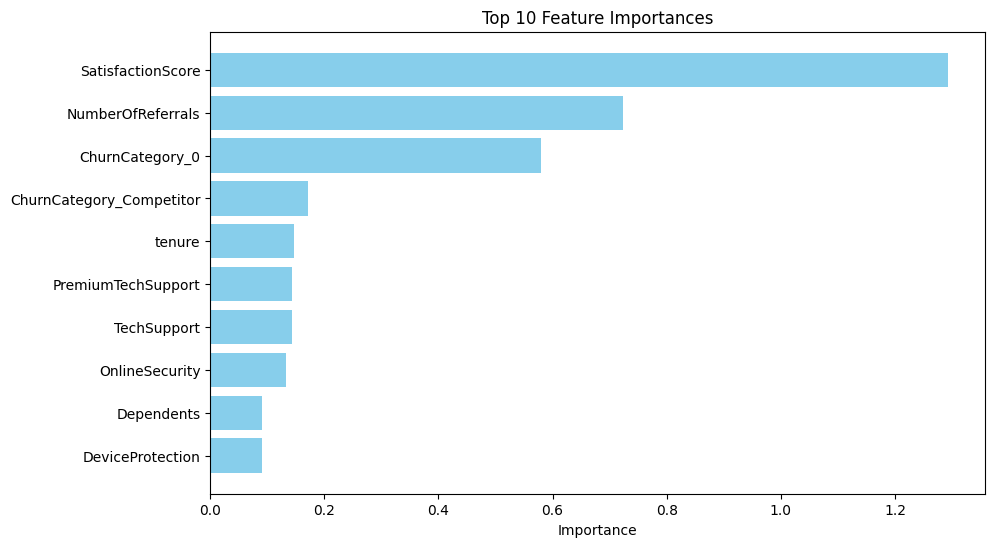

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit your logistic regression model (lr) first.

# Get the coefficients and feature names
coef = lr_clf.coef_[0]
feature_names = X.columns

# Calculate feature importances (absolute values of coefficients)
importances = np.abs(coef)

# Create a DataFrame to store the feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
N = 10  # You can change N to the number of top features you want to plot
top_N_features = feature_importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_N_features['Feature'], top_N_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {N} Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


#### 랜덤포레스트

In [74]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'max_depth':[6, 8, 10],
    'n_estimators':[50, 100, 200],
    'min_samples_leaf':[8, 12, 18], # 최소한의 샘플 데이터 수
    'min_samples_split':[8, 16, 20] # 노드를 분할하기 위한 최소한의 샘플 데이터 수
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)

rf_pred_tr = lr_clf.predict(X_train_over)
rf_pred_test = lr_clf.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, rf_pred_tr))
print('Test ACC : ', accuracy_score(y_test, rf_pred_test))

Train ACC :  0.9093772716258783
Test ACC :  0.8777540867093105


In [75]:
importances = rf_clf.feature_importances_
important_cols = pd.Series(importances, index=X.columns).sort_values(ascending=False)
important_cols

ChurnCategory_0                            0.380696
SatisfactionScore                          0.311851
ChurnCategory_Competitor                   0.046399
Contract_24                                0.029389
Contract_1                                 0.029069
tenure                                     0.028049
NumberOfReferrals                          0.018536
TechSupport                                0.017593
MonthlyCharges                             0.016522
AvgMonthlyGBDownload                       0.014144
OnlineSecurity                             0.010784
Contract_12                                0.007657
ChurnCategory_Attitude                     0.007338
PremiumTechSupport                         0.007094
Dependents                                 0.006851
ChurnCategory_Dissatisfaction              0.006522
Married                                    0.005791
InternetService                            0.005079
PaymentMethod_Mailed check                 0.004813
TotalCharges

#### 의사결정나무

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, max_depth=4)

dt.fit(X_train_over, y_train_over)

dt_pred_tr = lr_clf.predict(X_train_over)
dt_pred_test = lr_clf.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, dt_pred_tr))
print('Test ACC : ', accuracy_score(y_test, dt_pred_test))

Train ACC :  0.9093772716258783
Test ACC :  0.8777540867093105


In [78]:
importances = dt.feature_importances_
important_cols = pd.Series(importances, index=X.columns).sort_values(ascending=False)
important_cols

ChurnCategory_0                            1.0
gender                                     0.0
PaymentMethod_Electronic check             0.0
PremiumTechSupport                         0.0
UnlimitedData                              0.0
TotalRefunds                               0.0
TotalExtraDataCharges                      0.0
TotalLongDistanceCharges                   0.0
SatisfactionScore                          0.0
Contract_1                                 0.0
Contract_12                                0.0
Contract_24                                0.0
PaymentMethod_Bank transfer (automatic)    0.0
PaymentMethod_Credit card (automatic)      0.0
PaymentMethod_Mailed check                 0.0
SeniorCitizen                              0.0
Offer_None                                 0.0
Offer_Offer A                              0.0
Offer_Offer B                              0.0
Offer_Offer C                              0.0
Offer_Offer D                              0.0
Offer_Offer E

#### SVM

In [83]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train_over, y_train_over)
import numpy as np

# Convert Pandas Series to Numpy array
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

svm_pred_tr = svm.predict(X_test)
svm_pred_test = svm.predict(y_test)

print('Train ACC : ', accuracy_score(y_train_over, svm_pred_tr))
print('Test ACC : ', accuracy_score(y_test, svm_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: ignored

#### XGBoost

In [82]:
from xgboost.sklearn import XGBClassifier

evals = [(X_test, y_test)]

xgb = XGBClassifier()
xgb.set_params(early_stopping_rounds=30)

xgb.fit(X_train_over, y_train_over, eval_set=evals)

xgb_pred_tr = xgb.predict(X_train_over)
xgb_pred_test = xgb.predict(X_test)

print('Train ACC : ', accuracy_score(y_train_over, xgb_pred_tr))
print('Test ACC : ', accuracy_score(y_test, xgb_pred_test))

[0]	validation_0-logloss:0.43769
[1]	validation_0-logloss:0.29653
[2]	validation_0-logloss:0.20757
[3]	validation_0-logloss:0.14804
[4]	validation_0-logloss:0.10684
[5]	validation_0-logloss:0.07773
[6]	validation_0-logloss:0.05686
[7]	validation_0-logloss:0.04177
[8]	validation_0-logloss:0.03078
[9]	validation_0-logloss:0.02274
[10]	validation_0-logloss:0.01683
[11]	validation_0-logloss:0.01249
[12]	validation_0-logloss:0.00929
[13]	validation_0-logloss:0.00692
[14]	validation_0-logloss:0.00518
[15]	validation_0-logloss:0.00388
[16]	validation_0-logloss:0.00293
[17]	validation_0-logloss:0.00222
[18]	validation_0-logloss:0.00169
[19]	validation_0-logloss:0.00130
[20]	validation_0-logloss:0.00101
[21]	validation_0-logloss:0.00079
[22]	validation_0-logloss:0.00063
[23]	validation_0-logloss:0.00051
[24]	validation_0-logloss:0.00041
[25]	validation_0-logloss:0.00034
[26]	validation_0-logloss:0.00029
[27]	validation_0-logloss:0.00024
[28]	validation_0-logloss:0.00021
[29]	validation_0-loglos

In [43]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost.sklearn import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# def Modeling_result(train_x, train_y, valid_x, valid_y):

#     models = [LogisticRegression(solver='liblinear'), RandomForestClassifier(), AdaBoostClassifier(),
#               XGBClassifier(), SVC(kernel='linear', C=1.0), DecisionTreeClassifier()]
#     names = ["Logistic","RF","Ada","XGB", "SVM", "DT"]

#     train_acc = []
#     train_precision = []
#     train_recall = []
#     train_roc = []

#     valid_acc = []
#     valid_precision = []
#     valid_recall = []
#     valid_roc = []


#     for model, name in zip(models, names):

#         model.fit(train_x,train_y)
#         model.predict(valid_x)

#         train_acc.append(accuracy_score(train_y,model.predict(train_x)))
#         train_precision.append(precision_score(train_y,model.predict(train_x)))
#         train_recall.append(recall_score(train_y,model.predict(train_x)))
#         train_roc.append(roc_auc_score(train_y, model.predict(train_x)))

#         valid_acc.append(accuracy_score(valid_y, model.predict(valid_x)))
#         valid_precision.append(precision_score(valid_y,model.predict(valid_x)))
#         valid_recall.append(recall_score(valid_y,model.predict(valid_x)))
#         valid_roc.append(roc_auc_score(valid_y, model.predict(valid_x)))

#     return pd.DataFrame({"Model":names, "Train_Accuracy":train_acc, "Train_Precision":train_precision, "Train_Recall":train_recall, "Train_AUC":train_roc,
            #  "Valid_Accuracy":valid_acc, "Valid_Precision":valid_precision, "Valid_Recall":valid_recall, "Valid_AUC":valid_roc})